<a href="https://colab.research.google.com/github/pablopuch/fahrenheit_celsius/blob/main/Fahrenheit_a_Celsius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from sklearn import datasets
from sklearn.utils import shuffle

In [29]:
# Generar la lista de temperaturas aleatorias en Celsius
celsius = []
for i in range(1000):
    celsius.append(round(random.uniform(-200, 200)))

# Crear el DataFrame con la lista de Celsius
df = pd.DataFrame({'Celsius': celsius})

In [30]:
def celsius_a_fahrenheit(celsius):
    fahrenheit = []
    for temp in celsius:
        f = round((temp * 1.8) + 32)
        fahrenheit.append(f)
    return fahrenheit

# Convertir la lista de Celsius a Fahrenheit
fahrenheit = celsius_a_fahrenheit(celsius)

# Crear el DataFrame con las listas de Celsius y Fahrenheit
df = pd.DataFrame({'celsius': celsius, 'fahrenheit': fahrenheit})

# Imprimir las filas del DataFrame
df

,celsius,fahrenheit
0,119,246
1,152,306
2,185,365
3,21,70
4,69,156
...,...,...
995,-65,-85
996,-49,-56
997,19,66
998,-29,-20


In [31]:
X = df.drop(['celsius'], axis=1)
Y = df['celsius']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [32]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

print("Comenzando entrenamiento...")
historial = modelo.fit(fahrenheit, celsius, epochs=300, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 1680.7472
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 289.1648
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 233.9563
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 199.1606
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 170.7393
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 143.7274
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 117.1093
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 92.7495
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 68.9806
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 47.0265
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - loss: 29.3810
Epoch 12/300
32/32 [==============================] - 0s 3ms/step - los

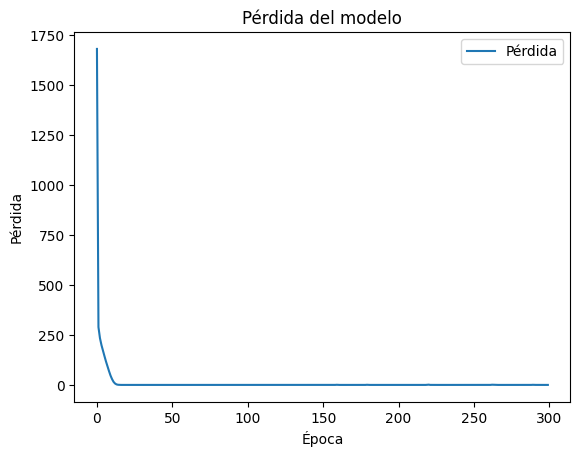

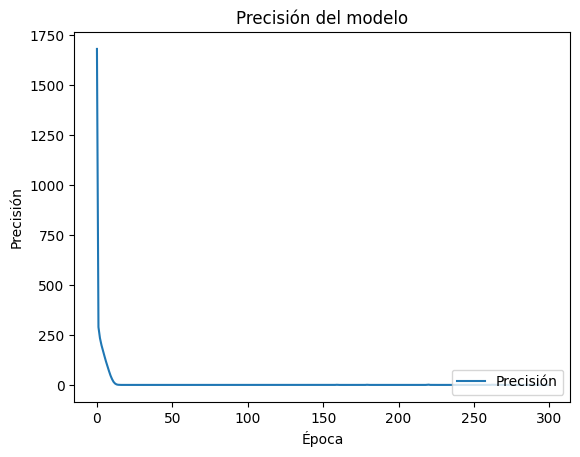

In [33]:
import matplotlib.pyplot as plt

# Gráfica de pérdida
plt.plot(historial.history['loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Pérdida'], loc='upper right')
plt.show()

# Gráfica de precisión
plt.plot(historial.history['loss'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Precisión'], loc='lower right')
plt.show()


In [34]:
resultado = modelo.predict([100.0])
print("Prediccion: 100 grados fahrenheit son " + str(resultado) + "Celsius!")

1/1 [==============================] - 0s 125ms/step
Prediccion: 100 grados fahrenheit son [[37.706604]]Celsius!


In [35]:
#Exportar el modelo en formato h5
modelo.save('celsius_a_fahrenheit.h5')

In [36]:
#El equipo es Linux. Listemos el contenido de la carpeta actual para ver que se exporto el modelo
!ls

celsius_a_fahrenheit.h5


In [37]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [39]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras celsius_a_fahrenheit.h5 carpeta_salida

2023-05-06 11:28:30.907101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [40]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

group1-shard1of1.bin  model.json


In [41]:
#Para descargarlos, da clic del lado izquierdo en el icono de la carpeta
#y expande carpeta_salida. En los archivos utiliza los 3 puntos para descargarlos